## Problem Statement

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

## Attribute Description

#### Input variables

Accident_ID: unique id assigned to each row

Accident_Type_Code: the type of accident (factor, not numeric)

Cabin_Temperature: the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident

Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints: number of complaints from mechanics prior to the accident

Days_Since_Inspection: how long the plane went without inspection before the incident

Safety_Score: a measure of how safe the plane was deemed to be

Violations: number of violations that the aircraft received during inspections

#### Target variable

Severity: a description (4 level factor) on the severity of the crash

## Solution

#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

#### Importing data

In [2]:
raw_data = pd.read_csv('.../train.csv')
raw_data.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

#### Short data description

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [4]:
raw_data.describe(include='all')

Severity  Safety_Score  Days_Since_Inspection  \
count                       10000  10000.000000           10000.000000   
unique                          4           NaN                    NaN   
top     Highly_Fatal_And_Damaging           NaN                    NaN   
freq                         3049           NaN                    NaN   
mean                          NaN     41.876406              12.931100   
std                           NaN     16.138072               3.539803   
min                           NaN      0.000000               1.000000   
25%                           NaN     30.593607              11.000000   
50%                           NaN     41.278539              13.000000   
75%                           NaN     52.511416              15.000000   
max                           NaN    100.000000              23.000000   

        Total_Safety_Complaints  Control_Metric  Turbulence_In_gforces  \
count              10000.000000    10000.000000           10000.000000   
unique                      NaN             NaN                    NaN   
top                         NaN             NaN                    NaN   
freq                        NaN             NaN                    NaN   
mean                   6.564300       65.145324               0.381495   
std                    6.971982       11.882934               0.121301   
min                    0.000000        0.000000               0.134000   
25%                    2.000000       56.927985               0.293665   
50%                    4.000000       65.587967               0.365879   
75%                    9.000000       73.336372               0.451346   
max                   54.000000      100.000000               0.882648   

        Cabin_Temperature  Accident_Type_Code  Max_Elevation   Violations  \
count        10000.000000        10000.000000   10000.000000  10000.00000   
unique                NaN                 NaN            NaN          NaN   
top                   NaN                 NaN            NaN          NaN   
freq                  NaN                 NaN            NaN          NaN   
mean            79.969331            3.814900   32001.803282      2.01220   
std              2.759739            1.902577    9431.995196      1.03998   
min             74.740000            1.000000     831.695553      0.00000   
25%             77.960000            2.000000   25757.636908      1.00000   
50%             79.540000            4.000000   32060.336419      2.00000   
75%             81.560000            5.000000   38380.641513      3.00000   
max             97.510000            7.000000   64297.651218      5.00000   

        Adverse_Weather_Metric   Accident_ID  
count             10000.000000  10000.000000  
unique                     NaN           NaN  
top                        NaN           NaN  
freq                       NaN           NaN  
mean                  0.255635   6266.554200  
std                   0.381128   3610.170288  
min                   0.000316      2.000000  
25%                   0.012063   3139.750000  
50%                   0.074467   6280.500000  
75%                   0.354059   9391.500000  
max                   2.365378  12500.000000

#### Data Preprocessing

In [5]:
# checking for null values

raw_data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [6]:
# creating a savepoint

data = raw_data.copy()

In [7]:
# dropping Accident_ID variable

data = data.drop(['Accident_ID'], axis=1)

In [8]:
# separating the target variable

y = data['Severity']
data = data.drop('Severity', axis=1)

In [9]:
# cheking no. of data points per label

y.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [10]:
# label encoding the target variable

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
lab_enc.fit(y)
y = lab_enc.transform(y)

In [11]:
print('Labels: ', np.unique(y), '\nNo. of datapints per label:', np.bincount(y))

Labels:  [0 1 2 3] 
No. of datapints per label: [3049 2527 1695 2729]


In [12]:
# checking labeling

list(lab_enc.inverse_transform([3,2,1,0]))

C:\software\sdk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Minor_Damage_And_Injuries',
 'Highly_Fatal_And_Damaging']

In [13]:
# checking no. of data points against each Accident_Type_Code

data.Accident_Type_Code.value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [14]:
# converting Accident_Type_Code to string as it is categorical variable

data['Accident_Type_Code'] = data['Accident_Type_Code'].astype(str)

In [15]:
# creating dummies for Accident_Type_Code

data_dummies = pd.get_dummies(data['Accident_Type_Code'], prefix='Accident_Type_Code')
data_dummies.head()

Accident_Type_Code_1  Accident_Type_Code_2  Accident_Type_Code_3  \
0                     0                     1                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     1   
4                     0                     0                     1   

   Accident_Type_Code_4  Accident_Type_Code_5  Accident_Type_Code_6  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Accident_Type_Code_7  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0

In [16]:
# dropping variable for which dummies have been created

data = data.drop(['Accident_Type_Code'], axis=1)

In [17]:
data.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     49.223744                     14                       22   
1     62.465753                     10                       27   
2     63.059361                     13                       16   
3     48.082192                     11                        9   
4     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0       71.285324               0.272118              78.04   31335.476824   
1       72.288058               0.423939              84.54   26024.711057   
2       66.362808               0.322604              78.86   39269.053927   
3       74.703737               0.337029              81.79   42771.499200   
4       47.948952               0.541140              77.16   35509.228515   

   Violations  Adverse_Weather_Metric  
0           3                0.424352  
1           2                0.352350  
2           3                0.003364  
3           1                0.211728  
4           2                0.176883

In [18]:
# another savepoint

data_num = data.copy()

In [19]:
# list of numerical variable names

l1 = list(data_num.columns)
l1

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric']

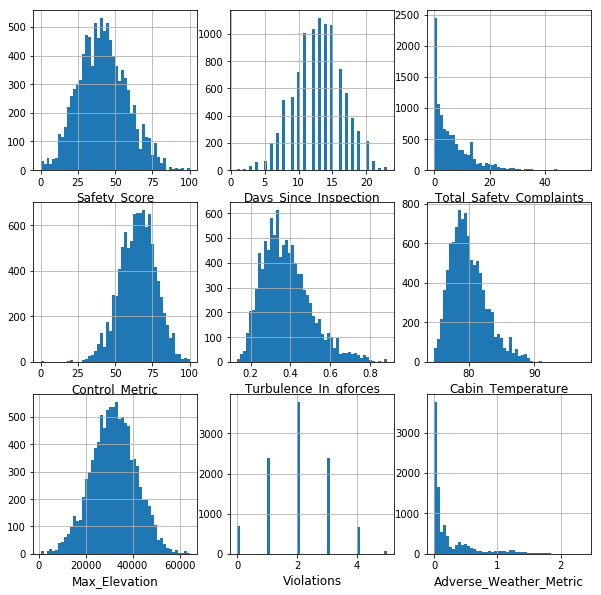

In [20]:
# plotting histograms for numerical variables

plt.figure(figsize=(10,10))
for i in range(len(l1)):
    plt.subplot(3,3,i+1)
    plt.xlabel(l1[i], fontsize=12)
    data_num[l1[i]].hist(bins=50)
plt.show()

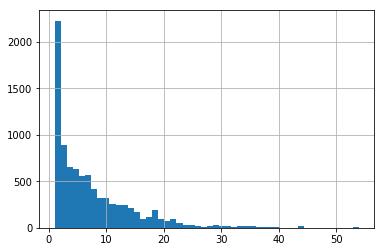

In [21]:
# checking Total_Safety_Complaints variable distribution for >0 values

data_num[data_num['Total_Safety_Complaints'] > 0]['Total_Safety_Complaints'].hist(bins=50)

In [22]:
# standardizing numerical variables

scaler = StandardScaler()
data_num[l1] = scaler.fit_transform(data_num[l1])

In [23]:
data_num_df = pd.DataFrame(data_num, columns=l1)
data_num_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.455303               0.301981                 2.214072   
1      1.275888              -0.828082                 2.931264   
2      1.312673               0.019465                 1.353442   
3      0.384562              -0.545566                 0.349373   
4     -0.953841               0.019465                 2.644388   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0        0.516733              -0.901749          -0.699134      -0.070649   
1        0.601122               0.349922           1.656279      -0.633736   
2        0.102462              -0.485516          -0.401990       0.770528   
3        0.804422              -0.366593           0.659758       1.141883   
4       -1.447221               1.316177          -1.018021       0.371883   

   Violations  Adverse_Weather_Metric  
0    0.949873                0.442701  
1   -0.011732                0.253773  
2    0.949873               -0.661939  
3   -0.973336               -0.115208  
4   -0.011732               -0.206638

In [24]:
# combining numerical and categorical variables

X = pd.concat([data_num, data_dummies], axis=1)
X.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.455303               0.301981                 2.214072   
1      1.275888              -0.828082                 2.931264   
2      1.312673               0.019465                 1.353442   
3      0.384562              -0.545566                 0.349373   
4     -0.953841               0.019465                 2.644388   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0        0.516733              -0.901749          -0.699134      -0.070649   
1        0.601122               0.349922           1.656279      -0.633736   
2        0.102462              -0.485516          -0.401990       0.770528   
3        0.804422              -0.366593           0.659758       1.141883   
4       -1.447221               1.316177          -1.018021       0.371883   

   Violations  Adverse_Weather_Metric  Accident_Type_Code_1  \
0    0.949873                0.442701                     0   
1   -0.011732                0.253773                     0   
2    0.949873               -0.661939                     0   
3   -0.973336               -0.115208                     0   
4   -0.011732               -0.206638                     0   

   Accident_Type_Code_2  Accident_Type_Code_3  Accident_Type_Code_4  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     1                     0   

   Accident_Type_Code_5  Accident_Type_Code_6  Accident_Type_Code_7  
0                     0                     0                     0  
1                     0                     0                     0  
2                     0                     0                     1  
3                     0                     0                     0  
4                     0                     0                     0

In [25]:
# The entire preprocessing stage can be completed executing the following function

#def Process_Data(x):
#    x['Accident_Type_Code'] = x['Accident_Type_Code'].astype(str)
#    d1 = pd.get_dummies(x['Accident_Type_Code'], prefix='Accident_Type_Code')
#    d2 = x.drop(['Accident_Type_Code'], axis=1)
#    scaler = StandardScaler()
#    d3 = pd.DataFrame(scaler.fit_transform(d2), columns=list(d2.columns))
#    data = pd.concat([d3,d1], axis=1)
#    return data

In [26]:
# splitting train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8500, 16) (1500, 16) (8500,) (1500,)


In [27]:
# converting data to numpy arrays

X_tr = np.array(X_train)
X_v = np.array(X_val)
y_tr = y_train
y_v = y_val

#### Data Modeling

In [28]:
# creating the structure and components of the multi-layered perceptron

hidden_layer_size = [50,25,10]
output_size = 4

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation='relu', input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(hidden_layer_size[1], activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size[2], activation='relu'),
    
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# checking model structure and no. of parameters

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                850       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 2,429
Trainable params: 2,429
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compiling and fitting data to the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_tr, y_tr, validation_data=(X_v,y_v), epochs=20, verbose=2)

Train on 8500 samples, validate on 1500 samples
Epoch 1/20
 - 1s - loss: 1.0684 - acc: 0.5566 - val_loss: 0.7252 - val_acc: 0.7293
Epoch 2/20
 - 0s - loss: 0.5614 - acc: 0.8036 - val_loss: 0.4527 - val_acc: 0.8627
Epoch 3/20
 - 0s - loss: 0.3541 - acc: 0.8898 - val_loss: 0.3118 - val_acc: 0.9020
Epoch 4/20
 - 0s - loss: 0.2650 - acc: 0.9213 - val_loss: 0.2598 - val_acc: 0.9193
Epoch 5/20
 - 0s - loss: 0.2328 - acc: 0.9286 - val_loss: 0.2365 - val_acc: 0.9220
Epoch 6/20
 - 0s - loss: 0.2156 - acc: 0.9320 - val_loss: 0.2244 - val_acc: 0.9267
Epoch 7/20
 - 0s - loss: 0.2041 - acc: 0.9351 - val_loss: 0.2172 - val_acc: 0.9247
Epoch 8/20
 - 0s - loss: 0.1938 - acc: 0.9372 - val_loss: 0.2249 - val_acc: 0.9273
Epoch 9/20
 - 0s - loss: 0.1877 - acc: 0.9387 - val_loss: 0.2149 - val_acc: 0.9240
Epoch 10/20
 - 0s - loss: 0.1800 - acc: 0.9413 - val_loss: 0.2203 - val_acc: 0.9207
Epoch 11/20
 - 0s - loss: 0.1757 - acc: 0.9414 - val_loss: 0.2107 - val_acc: 0.9273
Epoch 12/20
 - 0s - loss: 0.1720 - ac

In [30]:
# making predictions and checking model performance

y_pred = model.predict_classes(X_v)

cnf_mt = confusion_matrix(y_pred, y_v)
f1 = f1_score(y_pred, y_v, average='weighted')
print('Confusion Matrix:\n\n',cnf_mt,'\n\nf1 Score: ',100*f1,'\n\nClassification Report: \n\n',classification_report(y_pred,y_v))

Confusion Matrix:

 [[424  15   7   7]
 [  7 352   1  15]
 [ 10   1 239   6]
 [ 17  11   7 381]] 

f1 Score:  93.06503300712096 

Classification Report: 

              precision    recall  f1-score   support

          0       0.93      0.94      0.93       453
          1       0.93      0.94      0.93       375
          2       0.94      0.93      0.94       256
          3       0.93      0.92      0.92       416

avg / total       0.93      0.93      0.93      1500



In [31]:
# creating the structure and components of the multi-layered perceptron

hidden_layer_size = [60,30,10]
output_size = 4

act_funcs = ['sigmoid','tanh','relu']

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.05)

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[2], input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[0]),
    
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# checking model structure and no. of parameters

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 124       
Total params: 3,904
Trainable params: 3,904
Non-trainable params: 0
_________________________________________________________________


In [32]:
# compiling and fitting data to the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_tr, y_tr, validation_data=(X_v,y_v), epochs=100, verbose=2)

Train on 8500 samples, validate on 1500 samples
Epoch 1/100
 - 1s - loss: 1.1098 - acc: 0.5296 - val_loss: 0.8365 - val_acc: 0.6547
Epoch 2/100
 - 0s - loss: 0.6600 - acc: 0.7608 - val_loss: 0.5510 - val_acc: 0.8147
Epoch 3/100
 - 0s - loss: 0.4423 - acc: 0.8613 - val_loss: 0.4030 - val_acc: 0.8773
Epoch 4/100
 - 0s - loss: 0.3374 - acc: 0.9025 - val_loss: 0.3310 - val_acc: 0.9007
Epoch 5/100
 - 0s - loss: 0.2770 - acc: 0.9208 - val_loss: 0.2972 - val_acc: 0.9080
Epoch 6/100
 - 0s - loss: 0.2457 - acc: 0.9306 - val_loss: 0.2629 - val_acc: 0.9167
Epoch 7/100
 - 0s - loss: 0.2249 - acc: 0.9338 - val_loss: 0.2556 - val_acc: 0.9187
Epoch 8/100
 - 1s - loss: 0.2098 - acc: 0.9388 - val_loss: 0.2425 - val_acc: 0.9180
Epoch 9/100
 - 1s - loss: 0.1998 - acc: 0.9393 - val_loss: 0.2359 - val_acc: 0.9220
Epoch 10/100
 - 0s - loss: 0.1921 - acc: 0.9426 - val_loss: 0.2275 - val_acc: 0.9220
Epoch 11/100
 - 0s - loss: 0.1829 - acc: 0.9441 - val_loss: 0.2300 - val_acc: 0.9233
Epoch 12/100
 - 1s - loss:

In [33]:
# making predictions and checking model performance

y_pred = model.predict_classes(X_v)

cnf_mt = confusion_matrix(y_pred, y_v)
f1 = f1_score(y_pred, y_v, average='weighted')
print('Confusion Matrix:\n\n',cnf_mt,'\n\nf1 Score: ',100*f1,'\n\nClassification Report: \n\n',classification_report(y_pred,y_v))

Confusion Matrix:

 [[423  11  13  17]
 [  9 356   2  10]
 [ 11   4 234   5]
 [ 15   8   5 377]] 

f1 Score:  92.66388884682449 

Classification Report: 

              precision    recall  f1-score   support

          0       0.92      0.91      0.92       464
          1       0.94      0.94      0.94       377
          2       0.92      0.92      0.92       254
          3       0.92      0.93      0.93       405

avg / total       0.93      0.93      0.93      1500



In [34]:
# creating the structure and components of the multi-layered perceptron

hidden_layer_size = [50,100,75,30,10]
output_size = 4

act_funcs = ['sigmoid','tanh','relu']

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=0.05)

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1], input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[2]),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_layer_size[3], activation=act_funcs[2]),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size[4], activation=act_funcs[1]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

# checking model structure and no. of parameters

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                850       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 75)                7575      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2280      
__________

In [35]:
# compiling and fitting data to the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_tr, y_tr, validation_data=(X_v,y_v), epochs=100, callbacks=[es], verbose=2)

Train on 8500 samples, validate on 1500 samples
Epoch 1/100
 - 1s - loss: 0.9655 - acc: 0.5962 - val_loss: 0.5177 - val_acc: 0.8193
Epoch 2/100
 - 0s - loss: 0.5158 - acc: 0.8049 - val_loss: 0.3134 - val_acc: 0.9060
Epoch 3/100
 - 0s - loss: 0.3890 - acc: 0.8664 - val_loss: 0.2784 - val_acc: 0.9073
Epoch 4/100
 - 0s - loss: 0.3345 - acc: 0.8888 - val_loss: 0.2503 - val_acc: 0.9147
Epoch 5/100
 - 0s - loss: 0.3094 - acc: 0.8941 - val_loss: 0.2335 - val_acc: 0.9300
Epoch 6/100
 - 1s - loss: 0.2870 - acc: 0.9005 - val_loss: 0.2288 - val_acc: 0.9253
Epoch 7/100
 - 1s - loss: 0.2674 - acc: 0.9104 - val_loss: 0.2208 - val_acc: 0.9280
Epoch 8/100
 - 1s - loss: 0.2528 - acc: 0.9175 - val_loss: 0.2270 - val_acc: 0.9213
Epoch 9/100
 - 0s - loss: 0.2460 - acc: 0.9204 - val_loss: 0.2221 - val_acc: 0.9240
Epoch 10/100
 - 0s - loss: 0.2328 - acc: 0.9224 - val_loss: 0.2040 - val_acc: 0.9320
Epoch 11/100
 - 0s - loss: 0.2341 - acc: 0.9221 - val_loss: 0.1976 - val_acc: 0.9360
Epoch 12/100
 - 0s - loss:

In [36]:
# making predictions and checking model performance

y_pred = model.predict_classes(X_v)

cnf_mt = confusion_matrix(y_pred, y_v)
f1 = f1_score(y_pred, y_v, average='weighted')
print('Confusion Matrix:\n\n',cnf_mt,'\n\nf1 Score: ',100*f1,'\n\nClassification Report: \n\n',classification_report(y_pred,y_v))

Confusion Matrix:

 [[418  15   1  11]
 [  3 361   2  11]
 [ 15   1 242   2]
 [ 22   2   9 385]] 

f1 Score:  93.73613335724241 

Classification Report: 

              precision    recall  f1-score   support

          0       0.91      0.94      0.93       445
          1       0.95      0.96      0.96       377
          2       0.95      0.93      0.94       260
          3       0.94      0.92      0.93       418

avg / total       0.94      0.94      0.94      1500



Since neural networks are stochastic in nature, results obtained are different for each run. The model with the best result was saved, and its performance is given below.

In [37]:
model = tf.keras.models.load_model('.../airplanes_mlp_3.h5')

In [38]:
y_pred = model.predict_classes(X_v)

cnf_mt = confusion_matrix(y_pred, y_v)
f1 = f1_score(y_pred, y_v, average='weighted')
print('Confusion Matrix:\n\n',cnf_mt,'\n\nf1 Score: ',100*f1,'\n\nClassification Report: \n\n',classification_report(y_pred,y_v))

Confusion Matrix:

 [[432  15   3  12]
 [  3 359   0   9]
 [ 10   2 243   2]
 [ 13   3   8 386]] 

f1 Score:  94.66312323259649 

Classification Report: 

              precision    recall  f1-score   support

          0       0.94      0.94      0.94       462
          1       0.95      0.97      0.96       371
          2       0.96      0.95      0.95       257
          3       0.94      0.94      0.94       410

avg / total       0.95      0.95      0.95      1500

